In [ ]:
import tensorflow as tf

In [ ]:
def alex_net():
    input_image = tf.keras.Input(shape = (224, 224, 3))
    x = tf.keras.layers.Conv2D(96, 11, strides = 4, activation = 'relu')(input_image)
    x = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides = (2,2))(x)
    x = tf.keras.layers.Conv2D(256, 5, strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides = (2,2))(x)
    x = tf.keras.layers.Conv2D(384, 3, strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(384, 3, strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(256, 3, strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides = (2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dense(1000, activation = 'softmax')(x)
    x = tf.keras.Model(inputs = input_image, outputs = x)
    return x

In [ ]:
alex_net_model = alex_net()

In [ ]:
alex_net_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       132748

In [ ]:
X = tf.random.uniform((1, 224, 224, 3))
for layer in alex_net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t\t', X.shape)

InputLayer output shape:		 (1, 224, 224, 3)
Conv2D output shape:		 (1, 54, 54, 96)
MaxPooling2D output shape:		 (1, 26, 26, 96)
Conv2D output shape:		 (1, 26, 26, 256)
MaxPooling2D output shape:		 (1, 12, 12, 256)
Conv2D output shape:		 (1, 12, 12, 384)
Conv2D output shape:		 (1, 12, 12, 384)
Conv2D output shape:		 (1, 12, 12, 256)
MaxPooling2D output shape:		 (1, 5, 5, 256)
Flatten output shape:		 (1, 6400)
Dropout output shape:		 (1, 6400)
Dense output shape:		 (1, 4096)
Dropout output shape:		 (1, 4096)
Dense output shape:		 (1, 4096)
Dense output shape:		 (1, 1000)


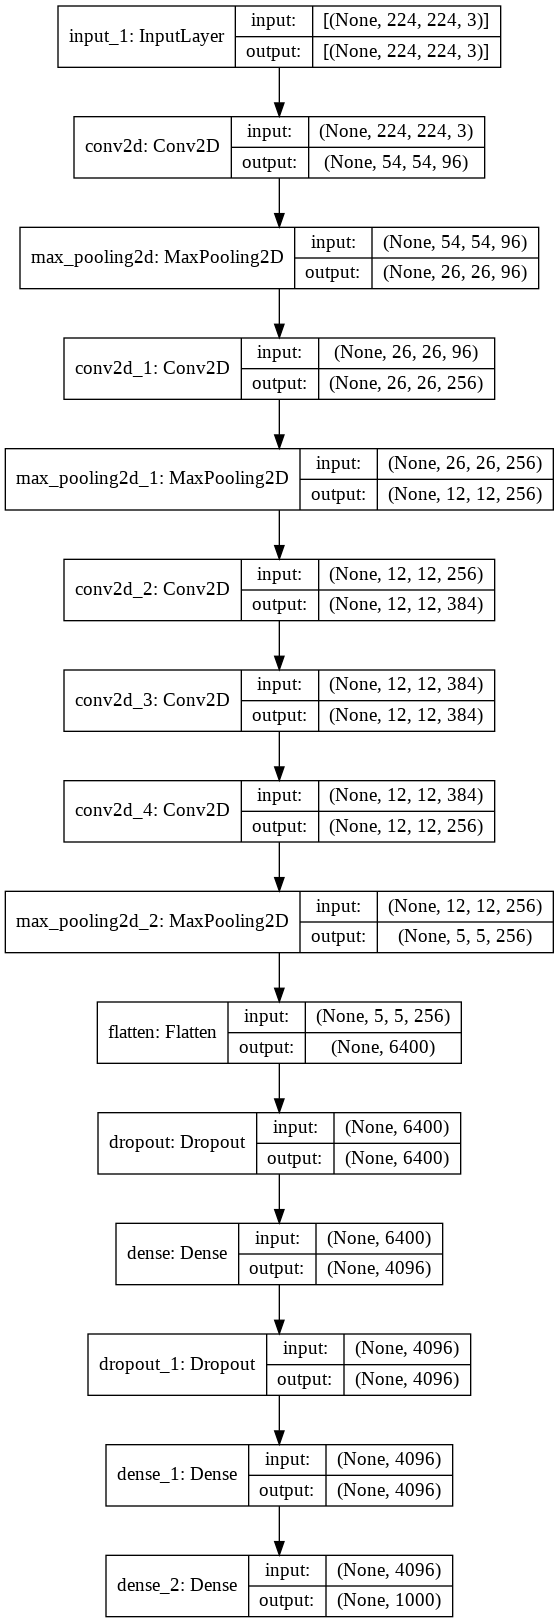

In [ ]:
tf.keras.utils.plot_model(alex_net_model, to_file='alex_net.png', show_shapes=True, show_layer_names=True)